<a href="https://colab.research.google.com/github/Esperqn/MicroProyect/blob/main/RN3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error
from scipy.stats import pearsonr
import numpy as np
import random
tf.random.set_seed(79)
np.random.seed(79)
random.seed(79)

In [ ]:
from sklearn.preprocessing import StandardScaler

datos = pd.read_excel('DATOS YL 3.xlsx')
    #Revolver todos los datos respecto a las filas nadamas
#columnas_seleccionadas = ['Glucosa', 'Spo2', 'Vpi', 'Pi', 'Temp manos', 'STD_Vpp'
#                              ,'Promedio ancho', 'Promedio prominencia','RMS_Vpp', 'STD_Senal' ]

    #datos = datos[columnas_seleccionadas]
    #Separación de caracteristicas y objetivo
#datos = datos[columnas_seleccionadas]
X = datos.iloc[:,2:].values # Todas las columnas
y = datos.iloc[:,1].values #Columna de glucosa

#X = datos.drop('Glucosa', axis=1) # Todas las columnas
#y = datos['Glucosa'] #Columna de glucosa

    #Separación del set de datos
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=79)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=79)

print(f"Train shapes: {X_train.shape}, {y_train.shape}")
print(f"Val shapes: {X_val.shape}, {y_val.shape}")
print(f"Test shapes: {X_test.shape}, {y_test.shape}")

Train shapes: (365, 21), (365,)
Val shapes: (78, 21), (78,)
Test shapes: (79, 21), (79,)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_X = MinMaxScaler()
scaler_X.fit(X_train)

X_train_std = scaler_X.fit_transform(X_train)
X_val_std = scaler_X.transform(X_val)
X_test_std = scaler_X.transform(X_test)

scaler_y = MinMaxScaler()
y_train_std =scaler_y.fit_transform(y_train.reshape(-1,1))
y_val_std = scaler_y.transform(y_val.reshape(-1,1))
y_test_std = scaler_y.transform(y_test.reshape(-1,1))
print("Rango de y_train: ", y_train.min(), y_train.max())
print("Rango de y_val: ", y_val.min(), y_val.max())
print("Rango de y_test: ", y_test.min(), y_test.max())


Rango de y_train:  72 163
Rango de y_val:  72 163
Rango de y_test:  72 163


In [ ]:
y_train_std

array([[0.31868132],
       [0.30769231],
       [0.34065934],
       [0.27472527],
       [0.40659341],
       [0.1978022 ],
       [0.14285714],
       [0.1978022 ],
       [0.51648352],
       [0.20879121],
       [0.15384615],
       [0.26373626],
       [0.31868132],
       [0.1978022 ],
       [0.47252747],
       [0.62637363],
       [0.25274725],
       [0.40659341],
       [0.31868132],
       [0.21978022],
       [0.40659341],
       [1.        ],
       [0.15384615],
       [0.21978022],
       [0.20879121],
       [0.08791209],
       [0.18681319],
       [0.40659341],
       [0.6043956 ],
       [0.40659341],
       [0.1978022 ],
       [1.        ],
       [0.1978022 ],
       [0.14285714],
       [0.15384615],
       [0.        ],
       [0.15384615],
       [0.40659341],
       [0.3956044 ],
       [1.        ],
       [0.26373626],
       [0.21978022],
       [0.20879121],
       [0.26373626],
       [0.31868132],
       [0.48351648],
       [0.21978022],
       [0.395

In [ ]:
class MAEOriginalScaleCallback(Callback):
  def __init__(self, X_train_scaled, y_train, scaler_y):
    self.X_train_scaled = X_train_scaled
    self.y_train = y_train
    self.scaler_y = scaler_y
  def on_epoch_end(self, epoch, logs= None):
    y_pred_scaled = self.model.predict(self.X_train_scaled, verbose=0)

    y_pred_original = self.scaler_y.inverse_transform(y_pred_scaled)

    mae= np.mean(np.abs(self.y_train - y_pred_original.flatten()))

    logs['mae_original_scale'] = mae
    print(f"Epoca {epoch +1}: MAE (glucosa original) = {mae:.2f} mg/dL")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoca 1: MAE (glucosa original) = 12.09 mg/dL
Epoca 2: MAE (glucosa original) = 11.71 mg/dL
Epoca 3: MAE (glucosa original) = 12.74 mg/dL
Epoca 4: MAE (glucosa original) = 11.65 mg/dL
Epoca 5: MAE (glucosa original) = 11.28 mg/dL
Epoca 6: MAE (glucosa original) = 11.24 mg/dL
Epoca 7: MAE (glucosa original) = 10.92 mg/dL
Epoca 8: MAE (glucosa original) = 11.13 mg/dL
Epoca 9: MAE (glucosa original) = 10.72 mg/dL
Epoca 10: MAE (glucosa original) = 13.21 mg/dL
Epoca 11: MAE (glucosa original) = 13.98 mg/dL
Epoca 12: MAE (glucosa original) = 12.95 mg/dL
Epoca 13: MAE (glucosa original) = 12.33 mg/dL
Epoca 14: MAE (glucosa original) = 12.01 mg/dL
Epoca 15: MAE (glucosa original) = 14.53 mg/dL
Epoca 16: MAE (glucosa original) = 10.43 mg/dL
Epoca 17: MAE (glucosa original) = 10.76 mg/dL
Epoca 18: MAE (glucosa original) = 11.61 mg/dL
Epoca 19: MAE (glucosa original) = 13.92 mg/dL
Epoca 20: MAE (glucosa original) = 11.50 mg/dL
Epoca 21: MAE (glucosa original) = 9.99 mg/dL
Epoca 22: MAE (glucosa 

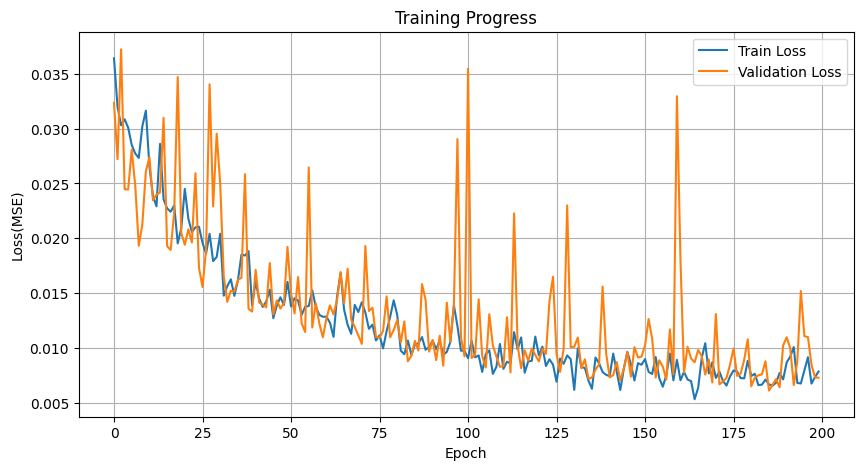

In [ ]:
#Número de características (equivalentes a numFeactures)
num_features = X_train.shape [1]

    #Definición del modelo
model = Sequential([
        #Capa de entrada
        Dense (50, activation = 'linear', input_shape = (num_features,)),
        BatchNormalization(), #Normalizar cada valor
        tf.keras.layers.Activation('sigmoid'),
        #Capa oculta
        Dense(50, activation = 'linear'),
        BatchNormalization(),
        tf.keras.layers.Activation('sigmoid'),
        #Capa de salida
        Dense(1, activation='sigmoid')
    ], name= 'MATLAB_equivalent_model')

#Configuración del optimizador (equivalente a trainigOptions)
optimizer = Adam(learning_rate=0.02, clipvalue=0.1)
model.compile(optimizer = optimizer, loss='mse',metrics=['mae'])


mae_callback = MAEOriginalScaleCallback(X_train_std, y_train, scaler_y)

#Hiperparámetros
minibatchsize=15
epochs=200

#Entrenamiento (equivalente a trainNetwork en MATLAB)
history = model.fit(
    X_train_std, y_train_std,
    batch_size=minibatchsize,
    epochs=epochs,
    validation_data = (X_val_std, y_val_std),
    shuffle=True,
    verbose=0,
    callbacks = [mae_callback]
)

#Visualización del proceso de entrenamiento

#Gráficar pérdida de entrenamiento y validación
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title ('Training Progress')
plt.ylabel('Loss(MSE)')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()
#Gráfica de accuracy
#plt.subplot(1,2,2)
#plt.plot(history.history['accuracy'], label = 'Accuracy Entrenamiendo')
#plt.plot(history.history['val_accuracy'], label='Accuracy validación')
#plt.title('Accuracy')
#plt.legend

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Generar predicciones para train, val y test
y_train_pred = model.predict(X_train_std)
y_test_pred = model.predict(X_test_std)
y_val_pred = model.predict(X_val_std)

y_train_pred_or = scaler_y.inverse_transform(y_train_pred.reshape(-1,1)).flatten()
y_val_pred_or = scaler_y.inverse_transform(y_val_pred.reshape(-1,1)).flatten()
y_test_pred_or = scaler_y.inverse_transform(y_test_pred.reshape(-1,1)).flatten()

#Función para calcular Pearson y evitar errores si hay
def calculate_pearson(y_true, y_pred):

    y_true = np.asarray(y_true).flatten()
    y_pred = np.asarray(y_pred).flatten()

    if y_true.size == 0 or y_pred.size == 0 or not np.isfinite(y_true).all() or not np.isfinite(y_pred).all():
        return np.nan

    correlation, _ = pearsonr(y_true, y_pred)
    return correlation
def print_metrics(y_true, y_pred, set_name):
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  R2 = r2_score(y_true, y_pred)
  r_value, _ = pearsonr(y_true, y_pred)
  print(f"{set_name}:")
  print(f"  MAE: {mae:.4f}")
  print(f"  MSE: {mse:.4f}")
  print(f"  R2: {R2:.4f}")
  print(f"  R: {r_value:.4f}")


print_metrics(y_train, y_train_pred_or, "Entrenamiento")
print_metrics(y_val, y_val_pred_or, "Validación")
print_metrics(y_test, y_test_pred_or, "Prueba")


    #Calcular Pearson para cada conjunto
pearson_train = calculate_pearson(y_train, y_train_pred_or)
pearson_test = calculate_pearson(y_test, y_test_pred_or)
pearson_val = calculate_pearson(y_val, y_val_pred_or)

print(f"Pearson Train: {pearson_train:.4f}")
print(f"Pearson Val: {pearson_val:.4f}")
print(f"Pearson Test: {pearson_test:.4f}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Entrenamiento:
  MAE: 4.0667
  MSE: 29.1423
  R2: 0.8939
  R: 0.9478
Validación:
  MAE: 5.2737
  MSE: 60.1390
  R2: 0.7447
  R: 0.8679
Prueba:
  MAE: 6.9339
  MSE: 87.9317
  R2: 0.6746
  R: 0.8298
Pearson Train: 0.9478
Pearson Val: 0.8679
Pearson Test: 0.8298


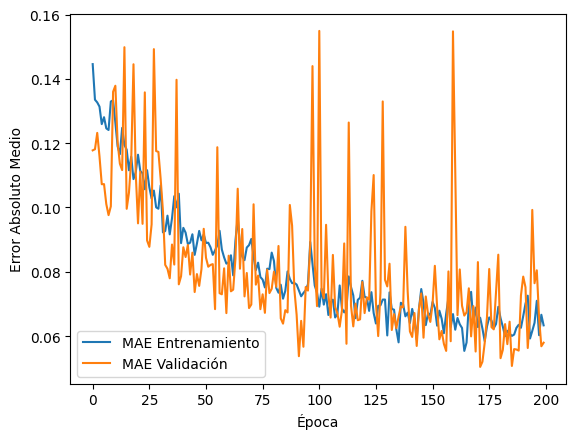

In [ ]:
from tensorflow.keras.callbacks import History

mae_train_per_epoch = history.history['mae']
mae_val_per_epoch = history.history['val_mae']

import matplotlib.pyplot as plt
plt.plot(mae_train_per_epoch, label='MAE Entrenamiento')
plt.plot(mae_val_per_epoch, label='MAE Validación')
plt.xlabel('Época')
plt.ylabel('Error Absoluto Medio')
plt.legend()
plt.show()

In [ ]:
class MAEOriginalScaleCallback(Callback):
  def __init__(self, X_train_scaled, y_train, scaler_y):
    self.X_train_scaled = X_train_scaled
    self.y_train = y_train
    self.scaler_y = scaler_y
  def on_epoch_end(self, epoch, logs= None):
    y_pred_scaled = self.model.predict(self.X_train_scaled, verbose=0)

    y_pred_original = self.scaler_y.inverse_transform(y_pred_scaled)

    mae= np.mean(np.abs(self.y_train - y_pred_original.flatten()))

    logs['mae_original_scale'] = mae
    print(f"Epoca {epoch +1}: MAE (glucosa original) = {mae:.2f} mg/dL")


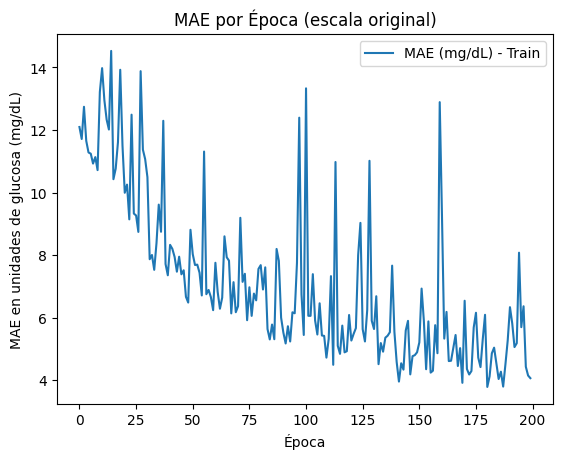

In [ ]:
plt.plot(history.history['mae_original_scale'], label='MAE (mg/dL) - Train')
plt.xlabel('Época')
plt.ylabel('MAE en unidades de glucosa (mg/dL)')
plt.title('MAE por Época (escala original)')
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_test_std, y_test_std)
y_pred_lr = lr.predict(X_test_std)
y_pred_lr_original = scaler_y.inverse_transform(y_pred_lr.reshape(-1,1)).flatten()

r2_lr = r2_score(y_test, y_pred_lr_original)
print(f"R2 (regresión lineal): {r2_lr:.4f}")

R2 (regresión lineal): 0.3082


In [ ]:
model.save('RN3.keras')

In [ ]:
from google.colab import drive
drive.mount('/content/sample_data')

# Cargar datos desde Drive
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/ruta/a/tu/datos.csv')